<a href="https://colab.research.google.com/github/priaJuli/Own_research/blob/main/Best_SF_Cancer_Wincosin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Gathering

datasources

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

### Prepare packages used

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer, StandardScaler, MinMaxScaler

from sklearn.model_selection import ShuffleSplit, cross_validate, train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt


### Load pandas dataframe

In [2]:

from sklearn.datasets import load_breast_cancer

databc = load_breast_cancer(as_frame=True)

dataX = databc.data

targetY = databc.target

databc.target_names
# path_data = "/content/gdrive/MyDrive/dataset/data.csv"

## Loading data
# df = pd.read_csv(path_data, sep=',')

# df.head()


array(['malignant', 'benign'], dtype='<U9')

In [3]:
class_dist = {'Malignant': np.unique(targetY, return_counts=True)[1][0], 'Benign': np.unique(targetY, return_counts=True)[1][1]}

# class_dist.values()

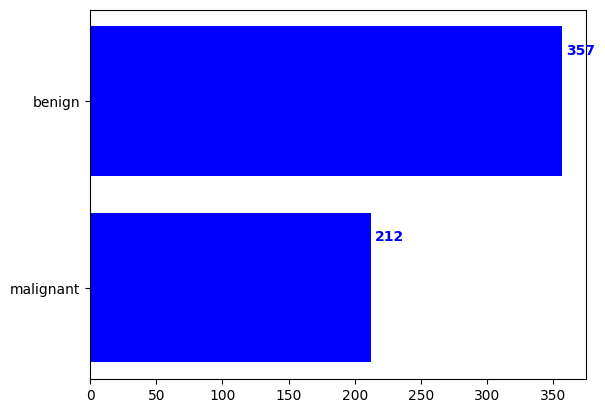

In [4]:
fig, ax = plt.subplots()
width = 0.75

ind = np.arange(len(class_dist.values()))

ax.barh(databc.target_names, class_dist.values(), color = "blue")

for i, v in enumerate(class_dist.values()):
    ax.text(v + 3, i + .25, str(v),
            color = 'blue', fontweight = 'bold')
plt.show()

In [5]:
databc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Define Functions for Features Selection (FS)



In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, StratifiedShuffleSplit

def get_subsets(keysf, df):
    dicts = dict()
    for onekeys in keysf:
        dicts[onekeys] = df[onekeys]
    return pd.DataFrame(dicts)

def cross_validate_subsets(df, keysf, targetY):
    dataX = get_subsets(keysf, df)

    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    # clf.fit(dataX, targetY)

    cv_res = cross_validate(clf, dataX, targetY, cv=sss)

    return cv_res

def RFcross_validate_subsets(df, keysf, targetY):
    dataX = get_subsets(keysf, df)

    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

    clf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100))
    # clf.fit(dataX, targetY)

    cv_res = cross_validate(clf, dataX, targetY, cv=sss)

    return cv_res


# subsetsOne = get_subsets(feats_count.keys(), dataX)



Try gets 20 features

In [7]:
from sklearn import feature_selection as SkFS

feats_number = 20
alphax = 0.5
percentile = 66

uniques_feats = []
feats_count = {}

In [8]:

Fs = SkFS.GenericUnivariateSelect(SkFS.chi2, mode='k_best', param=feats_number)

Xnew1 = Fs.fit_transform(dataX, targetY)

Feats1 = Fs.get_feature_names_out()

print(Xnew1.shape)

(569, 20)


In [9]:
print(len(Feats1))
for fname in Feats1:
    uniques_feats.append(fname)
    if fname in feats_count.keys():
        feats_count[fname] += 1
    else:
        feats_count[fname] = 1

20


In [10]:
cross_resrf = RFcross_validate_subsets(dataX, Feats1, targetY)

cross_res = cross_validate_subsets(dataX, Feats1, targetY)

print("RF cross validate", np.mean(cross_resrf['test_score']) * 100)

print("SVM cross validate", np.mean(cross_res['test_score']) * 100)

RF cross validate 96.3157894736842
SVM cross validate 96.66666666666666


In [11]:
Fs = SkFS.SelectFpr(SkFS.chi2, alpha=alphax)

Xnew2 = Fs.fit_transform(dataX, targetY)

Feats2 = Fs.get_feature_names_out()

print(Xnew2.shape)

print(len(Feats2))
for fname in Feats2:
    uniques_feats.append(fname)
    if fname in feats_count.keys():
        feats_count[fname] += 1
    else:
        feats_count[fname] = 1

(569, 20)
20


In [12]:
cross_resrf = RFcross_validate_subsets(dataX, Feats2, targetY)

cross_res = cross_validate_subsets(dataX, Feats2, targetY)

print("RF Cross validate", np.mean(cross_resrf['test_score']) * 100)

print("SVM cross validate", np.mean(cross_res['test_score']) * 100)


RF Cross validate 96.3157894736842
SVM cross validate 96.66666666666666


In [13]:

Fs = SkFS.SelectFdr(SkFS.chi2, alpha=alphax)

Xnew3 = Fs.fit_transform(dataX, targetY)

Feats3 = Fs.get_feature_names_out()

print(Xnew3.shape)

print(len(Feats3))
for fname in Feats3:
    uniques_feats.append(fname)
    if fname in feats_count.keys():
        feats_count[fname] += 1
    else:
        feats_count[fname] = 1

(569, 19)
19


In [14]:
cross_resrf = RFcross_validate_subsets(dataX, Feats3, targetY)

cross_res = cross_validate_subsets(dataX, Feats3, targetY)

print("RF Cross validate", np.mean(cross_resrf['test_score']) * 100)

print("SVM cross validate", np.mean(cross_res['test_score']) * 100)


RF Cross validate 96.49122807017545
SVM cross validate 96.84210526315789


In [15]:

Fs4 = SkFS.SelectPercentile(SkFS.chi2, percentile=percentile)

Xnew4 = Fs4.fit_transform(dataX, targetY)

Feats4 = Fs4.get_feature_names_out()

print(Xnew4.shape)

print(len(Feats4))
for fname in Feats4:
    uniques_feats.append(fname)
    if fname in feats_count.keys():
        feats_count[fname] += 1
    else:
        feats_count[fname] = 1

(569, 20)
20


In [16]:
cross_resrf = RFcross_validate_subsets(dataX, Feats4, targetY)

cross_res = cross_validate_subsets(dataX, Feats4, targetY)

print("RF Cross validate", np.mean(cross_resrf['test_score']) * 100)

print("SVM cross validate", np.mean(cross_res['test_score']) * 100)


RF Cross validate 96.3157894736842
SVM cross validate 96.66666666666666


In [17]:
Fs5 = SkFS.VarianceThreshold()

Xnew5 = Fs5.fit_transform(dataX, targetY)

Feats5 = Fs5.get_feature_names_out()

print(Xnew5.shape)

print(len(Feats5))
for fname in Feats5:
    uniques_feats.append(fname)
    if fname in feats_count.keys():
        feats_count[fname] += 1
    else:
        feats_count[fname] = 1

(569, 30)
30


In [18]:
cross_resrf = RFcross_validate_subsets(dataX, Feats5, targetY)

cross_res = cross_validate_subsets(dataX, Feats5, targetY)

print("RF Cross validate", np.mean(cross_resrf['test_score']) * 100)

print("SVM cross validate", np.mean(cross_res['test_score']) * 100)


RF Cross validate 95.78947368421052
SVM cross validate 97.19298245614034


In [19]:
FsM1 = SkFS.SelectFromModel(estimator=RandomForestClassifier(n_estimators=100))

XnewM1 = FsM1.fit_transform(dataX, targetY)

FeatsM1 = FsM1.get_feature_names_out()

print(XnewM1.shape)

print(len(FeatsM1))
for fname in FeatsM1:
    uniques_feats.append(fname)
    if fname in feats_count.keys():
        feats_count[fname] += 1
    else:
        feats_count[fname] = 1

(569, 10)
10


In [20]:
cross_resrf = RFcross_validate_subsets(dataX, FeatsM1, targetY)

cross_res = cross_validate_subsets(dataX, FeatsM1, targetY)

print("RF Cross validate", np.mean(cross_resrf['test_score']) * 100)

print("SVM cross validate", np.mean(cross_res['test_score']) * 100)


RF Cross validate 95.6140350877193
SVM cross validate 95.96491228070174


In [21]:
FsM1 = SkFS.SelectFromModel(estimator=LinearSVC(random_state=0, tol=1e-5))

XnewM1 = FsM1.fit_transform(dataX, targetY)

FeatsM1 = FsM1.get_feature_names_out()

print(XnewM1.shape)

print(len(FeatsM1))
for fname in FeatsM1:
    uniques_feats.append(fname)
    if fname in feats_count.keys():
        feats_count[fname] += 1
    else:
        feats_count[fname] = 1

(569, 8)
8


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [22]:
cross_resrf = RFcross_validate_subsets(dataX, FeatsM1, targetY)

cross_res = cross_validate_subsets(dataX, FeatsM1, targetY)

print("RF Cross validate", np.mean(cross_resrf['test_score']) * 100)

print("SVM cross validate", np.mean(cross_res['test_score']) * 100)


RF Cross validate 95.43859649122807
SVM cross validate 96.3157894736842


In [23]:
np.unique(uniques_feats, return_counts=True)

(array(['area error', 'compactness error', 'concave points error',
        'concavity error', 'fractal dimension error', 'mean area',
        'mean compactness', 'mean concave points', 'mean concavity',
        'mean fractal dimension', 'mean perimeter', 'mean radius',
        'mean smoothness', 'mean symmetry', 'mean texture',
        'perimeter error', 'radius error', 'smoothness error',
        'symmetry error', 'texture error', 'worst area',
        'worst compactness', 'worst concave points', 'worst concavity',
        'worst fractal dimension', 'worst perimeter', 'worst radius',
        'worst smoothness', 'worst symmetry', 'worst texture'],
       dtype='<U23'),
 array([5, 4, 1, 5, 1, 6, 5, 6, 6, 1, 7, 7, 1, 1, 6, 5, 5, 1, 1, 1, 6, 6,
        6, 7, 1, 7, 7, 1, 5, 6]))

In [24]:
len(np.unique(uniques_feats))

30

In [25]:
totalsc = sum(feats_count.values())


In [26]:
weights_feats = {}
for keysf in feats_count.keys():
    weights_feats[keysf] = feats_count[keysf]/totalsc

In [27]:
cross_resrf = RFcross_validate_subsets(dataX, feats_count.keys(), targetY)

cross_res = cross_validate_subsets(dataX, feats_count.keys(), targetY)

print("RF Cross validate", np.mean(cross_resrf['test_score']) * 100)

print("SVM cross validate", np.mean(cross_res['test_score']) * 100)


RF Cross validate 96.14035087719299
SVM cross validate 97.19298245614034


In [28]:
# sample_weights =  [i for i in weights_feats.values()]

# sample_weights = np.array(sample_weights).reshape(-1, 1)

# Conclusion

For the case of Winconsin Breast Cancer, feature selection is not usefull for training machine learning, with standard scaler is outperformed the feature selection algorithms.